<a href="https://colab.research.google.com/github/KishorAlagappan/Task_6/blob/main/Assignment_(5_6_7).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [3]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

Data Cleaning

In [4]:
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [5]:
df.shape

(15, 2)

In [6]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [7]:
df.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

In [8]:
df = df.drop_duplicates()
df.shape

(15, 2)

In [9]:
df.dtypes

Chirps/Second         float64
Ground Temperature    float64
dtype: object

Plotting 

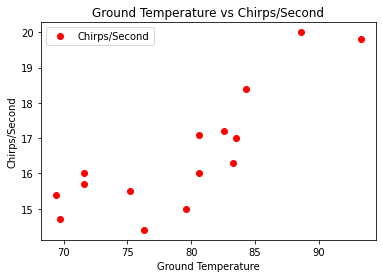

In [11]:
df.plot(x='Ground Temperature', y='Chirps/Second', style='o',color='r')
plt.title('Ground Temperature vs Chirps/Second')
plt.xlabel('Ground Temperature')
plt.ylabel('Chirps/Second')
plt.show()

In [12]:
# correlation 
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


Spliting the Dataset

In [18]:
X = df.loc[:, ['Ground Temperature']].values 
y = df.loc[:, 'Chirps/Second'].values 

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Modelling - Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [21]:
print(regressor.intercept_) 

0.681740888878954


In [23]:
print(regressor.coef_)

[0.20055639]


In [25]:
print(regressor.predict([[1]]))

[0.88229728]


In [28]:
y_pred = regressor.predict(X_test)
y_pred

array([16.8465857 , 19.39365182, 17.38808795])

In [29]:
df = pd.DataFrame({'Actual:': y_test, 'Predicted': y_pred})
df

,Actual:,Predicted
0,17.1,16.846586
1,19.8,19.393652
2,16.3,17.388088


Predict for 95 temperature

In [30]:
print("when temperature goes 95 then cricket sound will be :",regressor.predict([[95]]))

when temperature goes 95 then cricket sound will be : [19.73459768]


R2 - Score

In [31]:
from sklearn import metrics 
print('R2-Score:',metrics.r2_score(y_test,y_pred))

R2-Score: 0.7898999455730502


Determine 18 chirps per second (interpolate data)

In [35]:
print('Linear Regression Equation: y ={:.4f} * X + {:.4f}'.format(regressor.coef_[0],regressor.intercept_))

Linear Regression Equation: y =0.2006 * X + 0.6817


In [38]:
def temp_chirps(y):
  x = (y - regressor.intercept_) / regressor.coef_[0]
  print('With an observation of {} chirps/sec,we expect a ground temperature of {:.2f}˚F'.format(y,x))

temp_chirps(18)

With an observation of 18 chirps/sec,we expect a ground temp of 86.35˚F


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [65]:
df = pd.read_fwf("brain_body.txt")

In [66]:
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [67]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

In [45]:
df = df.drop_duplicates()
df.shape

(62, 2)

In [68]:
df.dtypes

Brain    float64
Body     float64
dtype: object

In [69]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [70]:
#iqr 
iqr = df.Brain.quantile(0.75) - df.Brain.quantile(0.25)
upper_threshold = df.Brain.quantile(0.75) + (1.5 * iqr)
lower_threshold = df.Brain.quantile(0.75) - (1.5 * iqr)
print(upper_threshold)

119.60625


In [71]:
print(lower_threshold)

-23.20125


In [74]:
iqr = df.Body.quantile(0.75) - df.Body.quantile(0.25)
upper_threshold_1 = df.Body.quantile(0.75) + (1.5 * iqr)
lower_threshold_1 = df.Body.quantile(0.75) - (1.5 * iqr) 
print(upper_threshold_1)

408.625


In [73]:
print(lower_threshold_1)

-76.625


In [75]:
df=df[((df["Brain"]<upper_threshold) & (df["Brain"]>lower_threshold)) & ((df["Body"]<upper_threshold_1) & (df["Body"]>lower_threshold_1))]

In [76]:
df.describe()

,Brain,Body
count,53.000000,53.000000
mean,19.956962,53.062642
std,46.422649,84.919039
min,0.005000,0.140000
25%,0.425000,3.500000
50%,1.700000,12.300000
75%,6.800000,58.000000
max,207.000000,406.000000


In [78]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

In [80]:
df = df.drop_duplicates()
df.shape

(53, 2)

Plotting

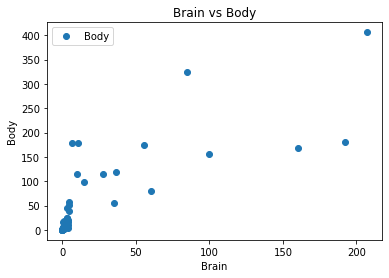

In [81]:
df.plot(x='Brain', y='Body', style='o')
plt.title('Brain vs Body')
plt.xlabel('Brain')
plt.ylabel('Body')
plt.show()

In [82]:
#correaltion
df.corr()

,Brain,Body
Brain,1.000000,0.799676
Body,0.799676,1.000000


Spliting the DATA

In [100]:
x = df.loc[:,['Body']].values
y = df.loc[:,'Brain'].values

from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

Linear Regression

In [101]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(x_train,y_train)

LinearRegression()

In [102]:
regressor.intercept_

-2.470518134695766

In [103]:
regressor.coef_

array([0.42713184])

In [104]:
y_pred = regressor.predict(x_test)
y_pred

array([ 5.00428898,  4.79072306, 32.12716051, 19.05692635, 14.2730498 ,
       16.53684853, 22.3031283 ,  8.20777774, 69.714762  , 74.19964627,
        2.8686298 ])

In [105]:
df = pd.DataFrame({'Actual': y_test , 'Predict': y_pred})
df

,Actual,Predict
0,1.410,5.004289
1,4.050,4.790723
2,60.000,32.127161
3,4.235,19.056926
4,4.288,14.273050
5,3.385,16.536849
6,4.190,22.303128
7,3.000,8.207778
8,160.000,69.714762
9,10.550,74.199646


In [108]:
print('Linear Regression : y = {:.4f} * X + {:.4f}'.format(regressor.coef_[0],regressor.intercept_))

Linear Regression : y = 0.4271 * X + -2.4705


R2 Score

In [111]:
from sklearn import metrics
print('R2 SCore :',metrics.r2_score(y_test,y_pred))

R2 SCore : 0.4090466039821521


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [119]:
df_sd = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [123]:
salary_discrim_cols = ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']

In [122]:
def lin_reg_eq_print(salary_discrim_cols, df):
    input_cols = df[salary_discrim_cols]
    salary = df['Salary']
    regr_sd = linear_model.LinearRegression()
    regr_sd.fit(input_cols, salary)
    print('The equation for columns {} with respect to Salary:\n'
          '{} + {}'.format(salary_discrim_cols, regr_sd.coef_, regr_sd.intercept_))

In [121]:
lin_reg_eq_print(salary_discrim_cols, df_sd)

The equation for columns ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'] with respect to Salary:
[ 1241.7924996   5586.18144952   482.85976783 -1331.64406341
  -128.79057354] + 11410.14654725559


In [120]:
def lin_reg_wrt_focus(salary_discrim_cols, df, focus='Salary'):
    input_cols = df[salary_discrim_cols]
    focus_output = df[focus]
    regr_sd = linear_model.LinearRegression()
    regr_sd.fit(input_cols, focus_output)
    return regr_sd.score(input_cols, focus_output)

In [124]:
print('R^2 score for equation using all columns: {}'
      .format(lin_reg_wrt_focus(salary_discrim_cols, df_sd)))

R^2 score for equation using all columns: 0.8547180674410969


In [125]:
from itertools import combinations

In [126]:
def get_combos(cols):
    return [combinations(cols, n + 1) for n in range(len(cols))]

In [127]:
combos = get_combos(salary_discrim_cols)

In [128]:
def all_combo_scores(combos, df, focus='Salary'):
    combo_scores = {}
    for m in range(len(list(combos))):
        for n in list(combos[m]):
            combo_scores[lin_reg_wrt_focus(list(n), df, focus)] = n
    return combo_scores

In [129]:
combo_scores = all_combo_scores(combos, df_sd)
sorted(combo_scores.items(), key=lambda c: c[0], reverse=True)

[(0.8547180674410969, ('Sex', 'Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8490366192262851, ('Sex', 'Rank', 'Year', 'YSdeg')),
 (0.8485077204335426, ('Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8456725764485596, ('Rank', 'Year', 'YSdeg')),
 (0.845547641297936, ('Sex', 'Rank', 'Year', 'Degree')),
 (0.8454319861987166, ('Sex', 'Rank', 'Year')),
 (0.8437395200874137, ('Rank', 'Year', 'Degree')),
 (0.8436480933264597, ('Rank', 'Year')),
 (0.7671813414350668, ('Sex', 'Rank', 'Degree', 'YSdeg')),
 (0.7666122610227071, ('Sex', 'Rank', 'YSdeg')),
 (0.7625149185326454, ('Rank', 'Degree', 'YSdeg')),
 (0.7623948189698249, ('Rank', 'YSdeg')),
 (0.7583144768153613, ('Sex', 'Rank', 'Degree')),
 (0.7557961688386643, ('Rank', 'Degree')),
 (0.7554917749443394, ('Sex', 'Rank')),
 (0.7525360539274633, ('Rank',)),
 (0.6311597502907436, ('Sex', 'Year', 'Degree', 'YSdeg')),
 (0.6236261611533503, ('Year', 'Degree', 'YSdeg')),
 (0.5832708257660315, ('Sex', 'Degree', 'YSdeg')),
 (0.5808063918180405, ('Sex', 'Year', 

In [130]:
num_by_sex = df_sd.Sex.value_counts()
print('Num men: {}\nNum women: {}'.format(num_by_sex[0], num_by_sex[1]))

Num men: 38
Num women: 14


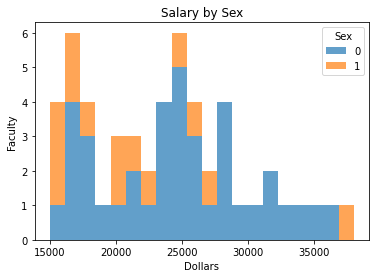

In [131]:
df_sd.pivot_table(index=df_sd.index, columns='Sex', values='Salary') \
    .plot(kind='hist', alpha=0.7, stacked=True, bins=20, title='Salary by Sex')
plt.xlabel('Dollars')
plt.ylabel('Faculty')
plt.show()

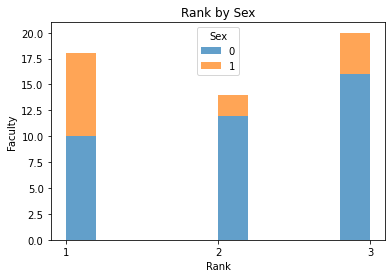

In [132]:
df_sd.pivot_table(index=df_sd.index, columns='Sex', values='Rank') \
    .plot(kind='hist', alpha=0.7, stacked=True, title='Rank by Sex')
plt.xticks([1, 2, 3])
plt.xlabel('Rank')
plt.ylabel('Faculty')
plt.show()

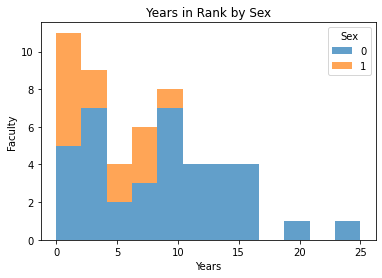

In [133]:
df_sd.pivot_table(index=df_sd.index, columns='Sex', values='Year') \
    .plot(kind='hist', alpha=0.7, stacked=True, bins=12,
          title='Years in Rank by Sex')
plt.xlabel('Years')
plt.ylabel('Faculty')
plt.show()

In [134]:
df_sd_10 = df_sd[df_sd['Year'] <= 10]
combos_10 = get_combos(salary_discrim_cols)
combo_10_scores = all_combo_scores(combos_10, df_sd_10)
sorted(combo_10_scores.items(), key=lambda c: c[0], reverse=True)

[(0.7968248819660304, ('Sex', 'Rank', 'Year', 'Degree', 'YSdeg')),
 (0.7872092866034841, ('Sex', 'Rank', 'Year', 'YSdeg')),
 (0.7857914167129874, ('Rank', 'Year', 'Degree', 'YSdeg')),
 (0.7812953737007232, ('Rank', 'Year', 'YSdeg')),
 (0.7811304025138202, ('Sex', 'Rank', 'Year', 'Degree')),
 (0.7809344717080977, ('Sex', 'Rank', 'Year')),
 (0.7783076155381674, ('Rank', 'Year', 'Degree')),
 (0.778125545829645, ('Rank', 'Year')),
 (0.7267866959953191, ('Sex', 'Rank', 'Degree', 'YSdeg')),
 (0.7266289950954575, ('Sex', 'Rank', 'Degree')),
 (0.7263171650507368, ('Rank', 'Degree', 'YSdeg')),
 (0.7262952984826756, ('Rank', 'Degree')),
 (0.7237917566538923, ('Sex', 'Rank', 'YSdeg')),
 (0.7237599305119999, ('Rank', 'YSdeg')),
 (0.7224004990910746, ('Sex', 'Rank')),
 (0.7221603677648399, ('Rank',)),
 (0.5211388967522836, ('Sex', 'Year', 'Degree', 'YSdeg')),
 (0.5106317178170396, ('Year', 'Degree', 'YSdeg')),
 (0.47582422204482044, ('Sex', 'Degree', 'YSdeg')),
 (0.46515893607776626, ('Sex', 'Year'

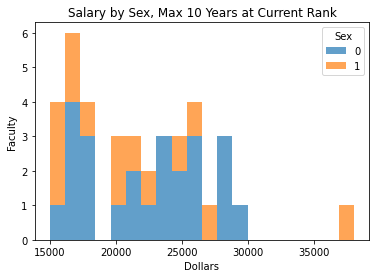

In [135]:
df_sd_10.pivot_table(index=df_sd_10.index, columns='Sex', values='Salary') \
    .plot(kind='hist', alpha=0.7, stacked=True, bins=20,
          title='Salary by Sex, Max 10 Years at Current Rank')
plt.xlabel('Dollars')
plt.ylabel('Faculty')
plt.show()

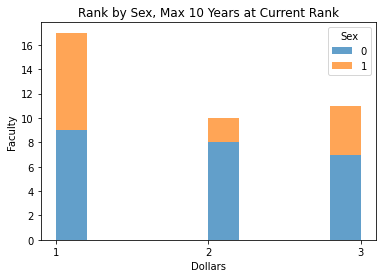

In [136]:
df_sd_10.pivot_table(index=df_sd_10.index, columns='Sex', values='Rank') \
    .plot(kind='hist', alpha=0.7, stacked=True, 
          title='Rank by Sex, Max 10 Years at Current Rank')
plt.xticks([1,2,3])
plt.xlabel('Dollars')
plt.ylabel('Faculty')
plt.show()

In [137]:
rank_discrim_cols = ['Sex', 'Year', 'Degree', 'YSdeg']
combos_rank = get_combos(rank_discrim_cols)
combo_rank_scores = all_combo_scores(combos_rank, df_sd_10, 'Rank')
sorted(combo_rank_scores.items(), key=lambda c: c[0], reverse=True)

[(0.6684776318082726, ('Sex', 'Year', 'Degree', 'YSdeg')),
 (0.6650836168279376, ('Sex', 'Degree', 'YSdeg')),
 (0.6123237979933462, ('Year', 'Degree', 'YSdeg')),
 (0.6121040013037697, ('Degree', 'YSdeg')),
 (0.5169568608935469, ('Sex', 'Year', 'YSdeg')),
 (0.5169178279759162, ('Sex', 'YSdeg')),
 (0.4848731472423391, ('Year', 'YSdeg')),
 (0.48257642674080226, ('YSdeg',)),
 (0.17754355818252243, ('Sex', 'Year', 'Degree')),
 (0.17641648396278564, ('Sex', 'Year')),
 (0.1761306214861189, ('Year', 'Degree')),
 (0.17502353196257248, ('Year',)),
 (0.016344674690073613, ('Sex', 'Degree')),
 (0.013387066889012145, ('Sex',)),
 (0.0036042103162727823, ('Degree',))]

 There is no correlation with Sex. There is no salary discrimination by Sex.